# APPLIED MACHINE LEARNING ASSIGNMENT 2

Lecturer's Name: Paul <br />
Student Name: Yap Li Xen (Kelvin) <br />
Student ID: P7414389 <br />
Class: DSAI/2021

# PART B: DEEP LEARNING

### Contents
1. Data Preparation <br />
2. Image Classification with Keras (Basic Neural Network) <br />
3. Image Classification with Keras (Convolutional Neural Network) <br />
    i) Deep Learning Process (Simple CNN) <br />
    ii) Deep Learning Process (CNN - Going Deeper) <br />

Data Preparation
==============

### Understand Dataset
Dataset from tf.keras.datasets.fashion_mnist.load_data()

![](image\classes.png)

### Import Dataset
Import dataset from Tensorflow Keras libraries (fashion_mnist) and split into Train dataset (X_train, y_train) and Test dataset (X_test, y_test).

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Randomly select few images from the dataset (X_train) to have a view of the images

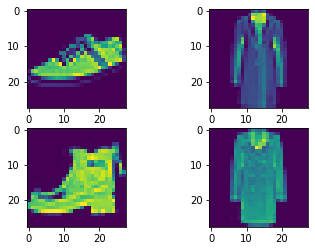

In [2]:
for i in range(221, 225, 1):
    plt.subplot(i)
    plt.imshow(X_train[np.random.randint(0, 60000)])
plt.show()

Randomly select few images from the dataset (X_test) to have a view of the images

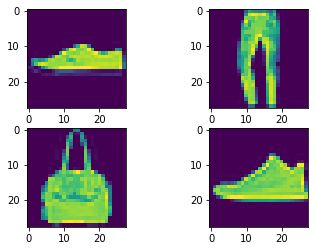

In [3]:
for i in range(221, 225, 1):
    plt.subplot(i)
    plt.imshow(X_test[np.random.randint(0, 10000)])
plt.show()

Image Classification with Keras (Basic Neural Network)
=============================================

### Data Import
Import fresh data

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

### Data Reshaping
The original image pixel is 28*28, reshaping (Flatten) data to 784 vector for each image

In [5]:
print("X_train Shape (Before): {}".format(X_train.shape))
print("X_test Shape (Before): {}".format(X_test.shape))

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

print("X_train Shape (After): {}".format(X_train.shape))
print("X_test Shape (After): {}".format(X_test.shape))

X_train Shape (Before): (60000, 28, 28)
X_test Shape (Before): (10000, 28, 28)
X_train Shape (After): (60000, 784)
X_test Shape (After): (10000, 784)


### Data Scaling
Normalize inputs from 0-255 to 0-1

In [6]:
X_train = X_train / 255
X_test = X_test / 255

### Data Encoding
Execute One Hot Encoding

In [7]:
from tensorflow.keras.utils import to_categorical

print("y_train Shape (Before): {}".format(y_train.shape))
print("y_test Shape (Before): {}".format(y_test.shape))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("y_train Shape (After): {}".format(y_train.shape))
print("y_test Shape (After): {}".format(y_test.shape))

y_train Shape (Before): (60000,)
y_test Shape (Before): (10000,)
y_train Shape (After): (60000, 10)
y_test Shape (After): (10000, 10)


### Deep Learning Process
Train, Compile and Evaluate Model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(784, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

training = model.fit(X_train, y_train, 
                     validation_split=0.2, 
                     batch_size=100, 
                     verbose=2, 
                     epochs=20)

print(model.summary())

score = model.evaluate(X_test, y_test)
print(score)
print("Score (Accuracy): {:.2f}%".format(score[1]*100))
print("Score (Error): {:.2f}%".format(100-score[1]*100))

Epoch 1/20
480/480 - 3s - loss: 0.5128 - accuracy: 0.8182 - val_loss: 0.4442 - val_accuracy: 0.8418
Epoch 2/20
480/480 - 3s - loss: 0.3764 - accuracy: 0.8640 - val_loss: 0.3567 - val_accuracy: 0.8690
Epoch 3/20
480/480 - 3s - loss: 0.3341 - accuracy: 0.8788 - val_loss: 0.3391 - val_accuracy: 0.8758
Epoch 4/20
480/480 - 3s - loss: 0.3086 - accuracy: 0.8874 - val_loss: 0.3343 - val_accuracy: 0.8760
Epoch 5/20
480/480 - 3s - loss: 0.2864 - accuracy: 0.8946 - val_loss: 0.3291 - val_accuracy: 0.8798
Epoch 6/20
480/480 - 3s - loss: 0.2708 - accuracy: 0.9002 - val_loss: 0.3356 - val_accuracy: 0.8749
Epoch 7/20
480/480 - 3s - loss: 0.2597 - accuracy: 0.9039 - val_loss: 0.3058 - val_accuracy: 0.8882
Epoch 8/20
480/480 - 3s - loss: 0.2462 - accuracy: 0.9086 - val_loss: 0.3131 - val_accuracy: 0.8888
Epoch 9/20
480/480 - 3s - loss: 0.2350 - accuracy: 0.9119 - val_loss: 0.3022 - val_accuracy: 0.8915
Epoch 10/20
480/480 - 3s - loss: 0.2237 - accuracy: 0.9183 - val_loss: 0.3130 - val_accuracy: 0.8901

### Learning Curve
To track the machine learning performance and identify under-fitting/over-fitting (if any)

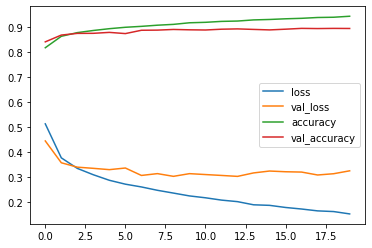

In [9]:
history = training.history

plt.plot(history['loss'], label="loss")
plt.plot(history['val_loss'], label="val_loss")
plt.plot(history['accuracy'], label="accuracy")
plt.plot(history['val_accuracy'], label="val_accuracy")

plt.legend(loc='best')
plt.show()

Image Classification with Keras (Convolutional Neural Network)
====================================================

### Data Import
Import fresh data

In [10]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

### Data Reshaping
This is to resolve different data shape (eg: channel first/last) issue.

In [11]:
from tensorflow.keras import backend as K

print("X_train Shape (Before): {}".format(X_train.shape))
print("X_test Shape (Before): {}".format(X_test.shape))

if K.image_data_format() == 'channels_first':
    print("channels_first")
    # reshape to be [samples][pixels][rows][columns]
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
    inputShape = (1,28,28)
else:
    print('channels_last')
    # reshape to be [samples][rows][columns][pixels]
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
    inputShape = (28,28,1)

print("X_train Shape (After): {}".format(X_train.shape))
print("X_test Shape (After): {}".format(X_test.shape))

X_train Shape (Before): (60000, 28, 28)
X_test Shape (Before): (10000, 28, 28)
channels_last
X_train Shape (After): (60000, 28, 28, 1)
X_test Shape (After): (10000, 28, 28, 1)


### Data Scaling
Normalize inputs from 0-255 to 0-1

In [12]:
X_train = X_train / 255
X_test = X_test / 255

### Data Encoding
Execute One Hot Encoding

In [13]:
from tensorflow.keras.utils import to_categorical

print("y_train Shape (Before): {}".format(y_train.shape))
print("y_test Shape (Before): {}".format(y_test.shape))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("y_train Shape (After): {}".format(y_train.shape))
print("y_test Shape (After): {}".format(y_test.shape))

y_train Shape (Before): (60000,)
y_test Shape (Before): (10000,)
y_train Shape (After): (60000, 10)
y_test Shape (After): (10000, 10)


### Deep Learning Process (Simple CNN)
Train, Compile and Evaluate Model
1 layer of Conv2D

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization

model = Sequential()
model.add(Conv2D(50, kernel_size=3, input_shape=inputShape, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

training = model.fit(X_train, y_train, 
                     validation_split=0.2, 
                     batch_size=100, 
                     verbose=2, 
                     epochs=10)

print(model.summary())

score = model.evaluate(X_test, y_test)
print(score)
print("Score (Accuracy): {:.2f}%".format(score[1]*100))
print("Score (Error): {:.2f}%".format(100-score[1]*100))

Epoch 1/10
480/480 - 11s - loss: 0.4530 - accuracy: 0.8415 - val_loss: 0.3662 - val_accuracy: 0.8662
Epoch 2/10
480/480 - 12s - loss: 0.3064 - accuracy: 0.8910 - val_loss: 0.3061 - val_accuracy: 0.8913
Epoch 3/10
480/480 - 12s - loss: 0.2650 - accuracy: 0.9046 - val_loss: 0.3033 - val_accuracy: 0.8898
Epoch 4/10
480/480 - 11s - loss: 0.2388 - accuracy: 0.9145 - val_loss: 0.2887 - val_accuracy: 0.8971
Epoch 5/10
480/480 - 11s - loss: 0.2187 - accuracy: 0.9221 - val_loss: 0.2918 - val_accuracy: 0.8983
Epoch 6/10
480/480 - 12s - loss: 0.2018 - accuracy: 0.9276 - val_loss: 0.2909 - val_accuracy: 0.8986
Epoch 7/10
480/480 - 11s - loss: 0.1866 - accuracy: 0.9341 - val_loss: 0.2873 - val_accuracy: 0.9024
Epoch 8/10
480/480 - 11s - loss: 0.1745 - accuracy: 0.9377 - val_loss: 0.2943 - val_accuracy: 0.9008
Epoch 9/10
480/480 - 11s - loss: 0.1630 - accuracy: 0.9414 - val_loss: 0.2958 - val_accuracy: 0.9003
Epoch 10/10
480/480 - 11s - loss: 0.1540 - accuracy: 0.9445 - val_loss: 0.3040 - val_accura

### Learning Curve
To track the machine learning performance and identify under-fitting/over-fitting (if any)

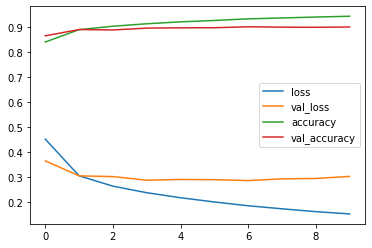

In [15]:
history = training.history

plt.plot(history['loss'], label="loss")
plt.plot(history['val_loss'], label="val_loss")
plt.plot(history['accuracy'], label="accuracy")
plt.plot(history['val_accuracy'], label="val_accuracy")

plt.legend(loc='best')
plt.show()

### Deep Learning Process (CNN - Going Deeper)
Train, Compile and Evaluate Model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization

model = Sequential()

model.add(Conv2D(50, kernel_size=3, input_shape=inputShape, activation='relu'))
model.add(MaxPool2D(2))
model.add(BatchNormalization())
model.add(Conv2D(25, kernel_size=3, input_shape=inputShape, activation='relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

training = model.fit(X_train, y_train, 
                     validation_split=0.2, 
                     batch_size=100, 
                     verbose=2, 
                     epochs=10)

print(model.summary())

score = model.evaluate(X_test, y_test)
print(score)
print("Score (Accuracy): {:.2f}%".format(score[1]*100))
print("Score (Error): {:.2f}%".format(100-score[1]*100))

Epoch 1/10
480/480 - 28s - loss: 0.4425 - accuracy: 0.8381 - val_loss: 0.4711 - val_accuracy: 0.8752
Epoch 2/10
480/480 - 28s - loss: 0.2947 - accuracy: 0.8926 - val_loss: 0.3084 - val_accuracy: 0.8825
Epoch 3/10
480/480 - 28s - loss: 0.2509 - accuracy: 0.9071 - val_loss: 0.2965 - val_accuracy: 0.8942
Epoch 4/10
480/480 - 27s - loss: 0.2246 - accuracy: 0.9166 - val_loss: 0.2771 - val_accuracy: 0.9014
Epoch 5/10
480/480 - 27s - loss: 0.2006 - accuracy: 0.9236 - val_loss: 0.2617 - val_accuracy: 0.9084
Epoch 6/10
480/480 - 28s - loss: 0.1801 - accuracy: 0.9317 - val_loss: 0.3221 - val_accuracy: 0.8888
Epoch 7/10
480/480 - 28s - loss: 0.1605 - accuracy: 0.9394 - val_loss: 0.2894 - val_accuracy: 0.8982
Epoch 8/10
480/480 - 28s - loss: 0.1438 - accuracy: 0.9450 - val_loss: 0.2635 - val_accuracy: 0.9106
Epoch 9/10
480/480 - 27s - loss: 0.1316 - accuracy: 0.9488 - val_loss: 0.2943 - val_accuracy: 0.9063
Epoch 10/10
480/480 - 29s - loss: 0.1210 - accuracy: 0.9535 - val_loss: 0.3853 - val_accura

### Learning Curve
To track the machine learning performance and identify under-fitting/over-fitting (if any)

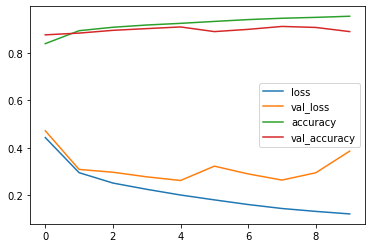

In [17]:
history = training.history

plt.plot(history['loss'], label="loss")
plt.plot(history['val_loss'], label="val_loss")
plt.plot(history['accuracy'], label="accuracy")
plt.plot(history['val_accuracy'], label="val_accuracy")

plt.legend(loc='best')
plt.show()